In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('C:/Users/lenovo/Downloads/train.csv')

In [3]:
df.sample(10)

,image_id,label,variety,age
8423,109776.jpg,normal,ADT45,60
2451,105462.jpg,blast,KarnatakaPonni,75
9541,103300.jpg,tungro,ADT45,60
2258,101212.jpg,blast,KarnatakaPonni,75
3306,106312.jpg,brown_spot,ADT45,68
4911,104777.jpg,dead_heart,AndraPonni,65
7114,102326.jpg,hispa,AtchayaPonni,65
5422,105262.jpg,downy_mildew,ADT45,60
10157,109737.jpg,tungro,ADT45,70
1320,105976.jpg,blast,ADT45,50


In [4]:
df['label'].value_counts()

normal                      1764
blast                       1738
hispa                       1594
dead_heart                  1442
tungro                      1088
brown_spot                   965
downy_mildew                 620
bacterial_leaf_blight        479
bacterial_leaf_streak        380
bacterial_panicle_blight     337
Name: label, dtype: int64

In [5]:
df['variety'].value_counts()

ADT45             6992
KarnatakaPonni     988
Ponni              657
AtchayaPonni       461
Zonal              399
AndraPonni         377
Onthanel           351
IR20               114
RR                  36
Surya               32
Name: variety, dtype: int64

In [6]:
df['age'].value_counts()

70    3077
60    1660
50    1066
75     866
65     774
55     563
72     552
45     505
67     415
68     253
80     225
57     213
47     112
77      42
73      38
66      36
62       5
82       5
Name: age, dtype: int64

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

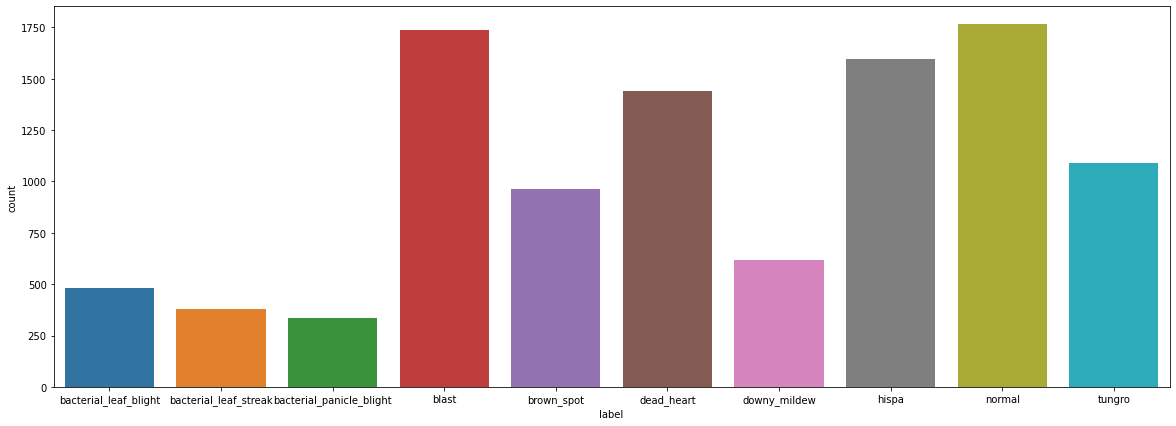

In [16]:
plt.figure(figsize=(20,7))
sns.countplot(data=df,x='label');

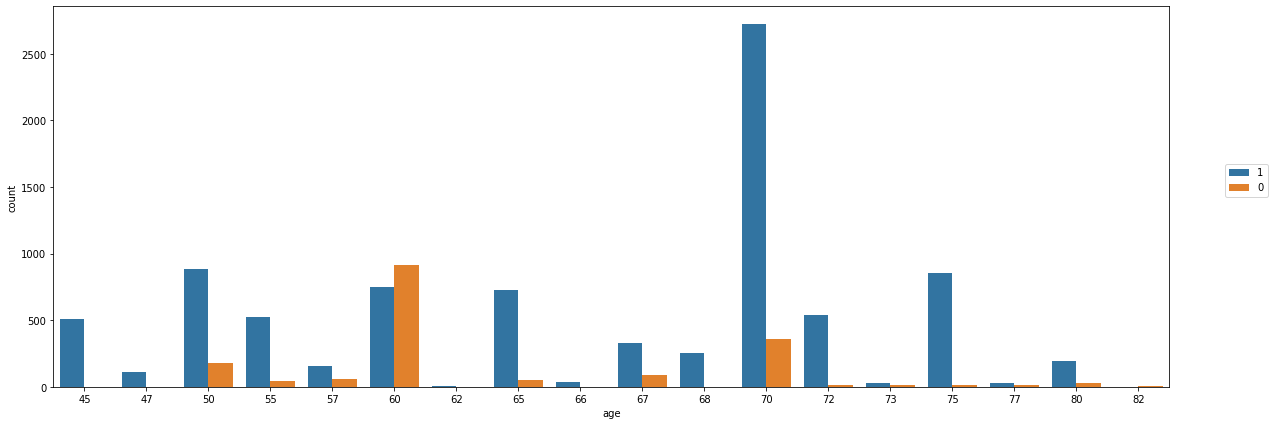

In [36]:
plt.figure(figsize=(20,7))
sns.countplot(data=df,x='age',hue=df['label'].apply(lambda x:'0' if(x=='normal') else '1'))
plt.legend(loc=(1.05,0.5));

There is a relation with plant getting disease in later or early stages of life<br>We gave nomral plants more around age 60

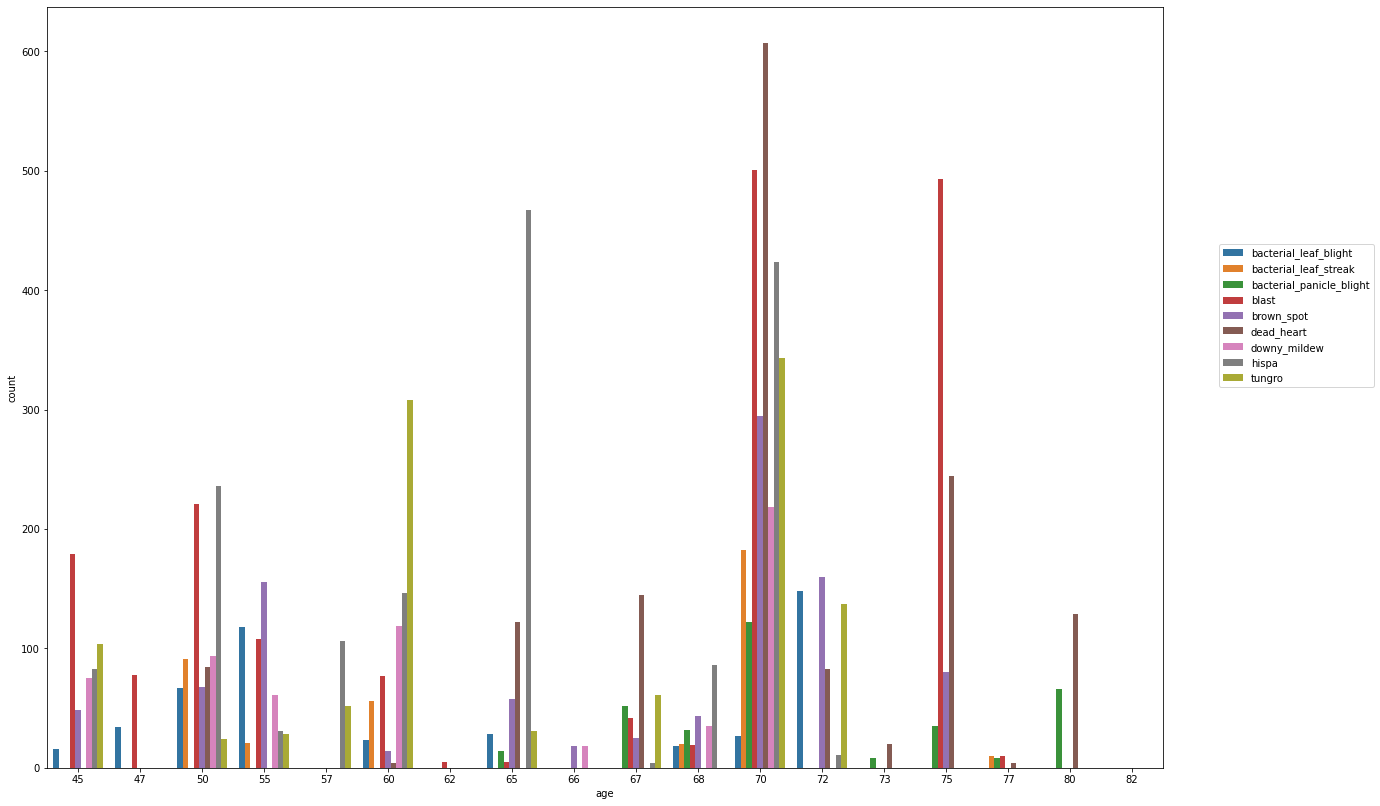

In [40]:
plt.figure(figsize=(20,14))
sns.countplot(data=df,x='age',hue=df['label'].apply(lambda x:None if(x=='normal') else x))
plt.legend(loc=(1.05,0.5));

<AxesSubplot:xlabel='variety', ylabel='count'>

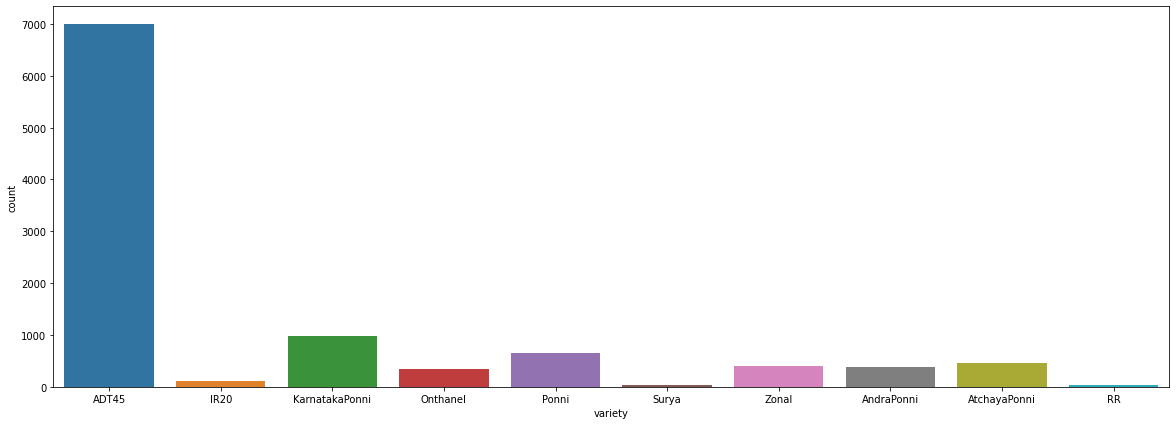

In [23]:
plt.figure(figsize=(20,7))
sns.countplot(data=df,x='variety')

In [86]:
df.groupby('variety').max()

,image_id,label,age
variety,,,
ADT45,110407.jpg,tungro,82
AndraPonni,110361.jpg,hispa,65
AtchayaPonni,110356.jpg,tungro,65
IR20,110215.jpg,dead_heart,70
KarnatakaPonni,110377.jpg,hispa,75
Onthanel,110405.jpg,tungro,70
Ponni,110376.jpg,tungro,80
RR,110269.jpg,normal,70
Surya,109865.jpg,tungro,45


tungro affects all the population more than any other disease.And RR variety has most normal cases so we can say RR has most disease tolerant

In [64]:
df.groupby('label').max()[['variety','age']]

,variety,age
label,,
bacterial_leaf_blight,Zonal,72
bacterial_leaf_streak,Zonal,77
bacterial_panicle_blight,Ponni,80
blast,Zonal,77
brown_spot,Zonal,75
dead_heart,Zonal,80
downy_mildew,Zonal,70
hispa,Zonal,72
normal,RR,82


From the above we can clearly say that zonal variety is the worst and it is getting affected by everything

#### Since our population has more ADT45 variety lets see what disease it is getting affected by the most

In [70]:
adt25_disease = df.groupby('variety').get_group('ADT45')['label']

In [93]:
adt25_disease.value_counts()

normal                      1457
tungro                       991
dead_heart                   979
brown_spot                   835
hispa                        833
blast                        793
bacterial_leaf_blight        406
downy_mildew                 331
bacterial_panicle_blight     260
bacterial_leaf_streak        107
Name: label, dtype: int64

In [81]:
adt25_disease.value_counts().keys()

Index(['normal', 'tungro', 'dead_heart', 'brown_spot', 'hispa', 'blast',
       'bacterial_leaf_blight', 'downy_mildew', 'bacterial_panicle_blight',
       'bacterial_leaf_streak'],
      dtype='object')

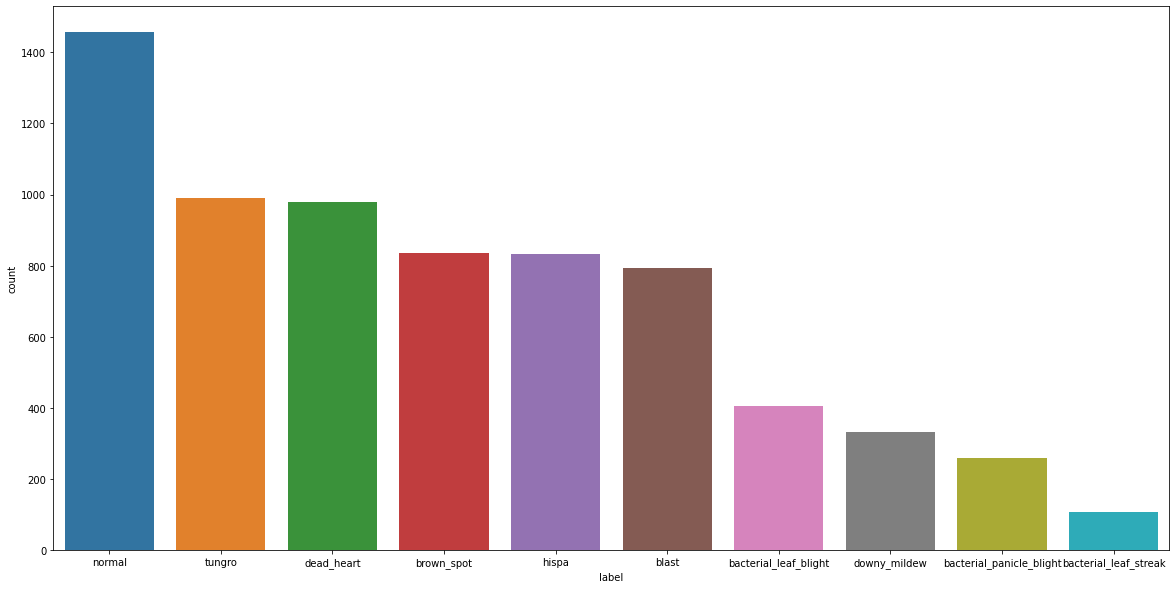

In [82]:
plt.figure(figsize=(20,10))
sns.countplot(x=adt25_disease,order=adt25_disease.value_counts().keys());

AD25 variety is mainly affted by tungro,dead_heart,brown_spot,hispa,blast

As we can see even tough tungro is affecting ad25 variety more but blast is the most common disease in all varities

In [88]:
df.groupby('label').get_group('blast')['variety'].value_counts()

ADT45             793
KarnatakaPonni    533
Ponni             136
AndraPonni        112
Zonal              83
AtchayaPonni       27
Onthanel           25
IR20               22
Surya               7
Name: variety, dtype: int64

Blast gets all its score from karnatakaponni i guess

In [91]:
df.groupby('variety').get_group('KarnatakaPonni')['label'].value_counts()

blast                    533
downy_mildew             121
dead_heart               113
brown_spot               110
hispa                     66
bacterial_leaf_streak     35
bacterial_leaf_blight     10
Name: label, dtype: int64

From the above we can see tungro is not affecting karnatakaponni at all.And in karnatakaponni variety has no normal values

#### That means karnatakaponni variety is affecting by atleast one disease but not tungro